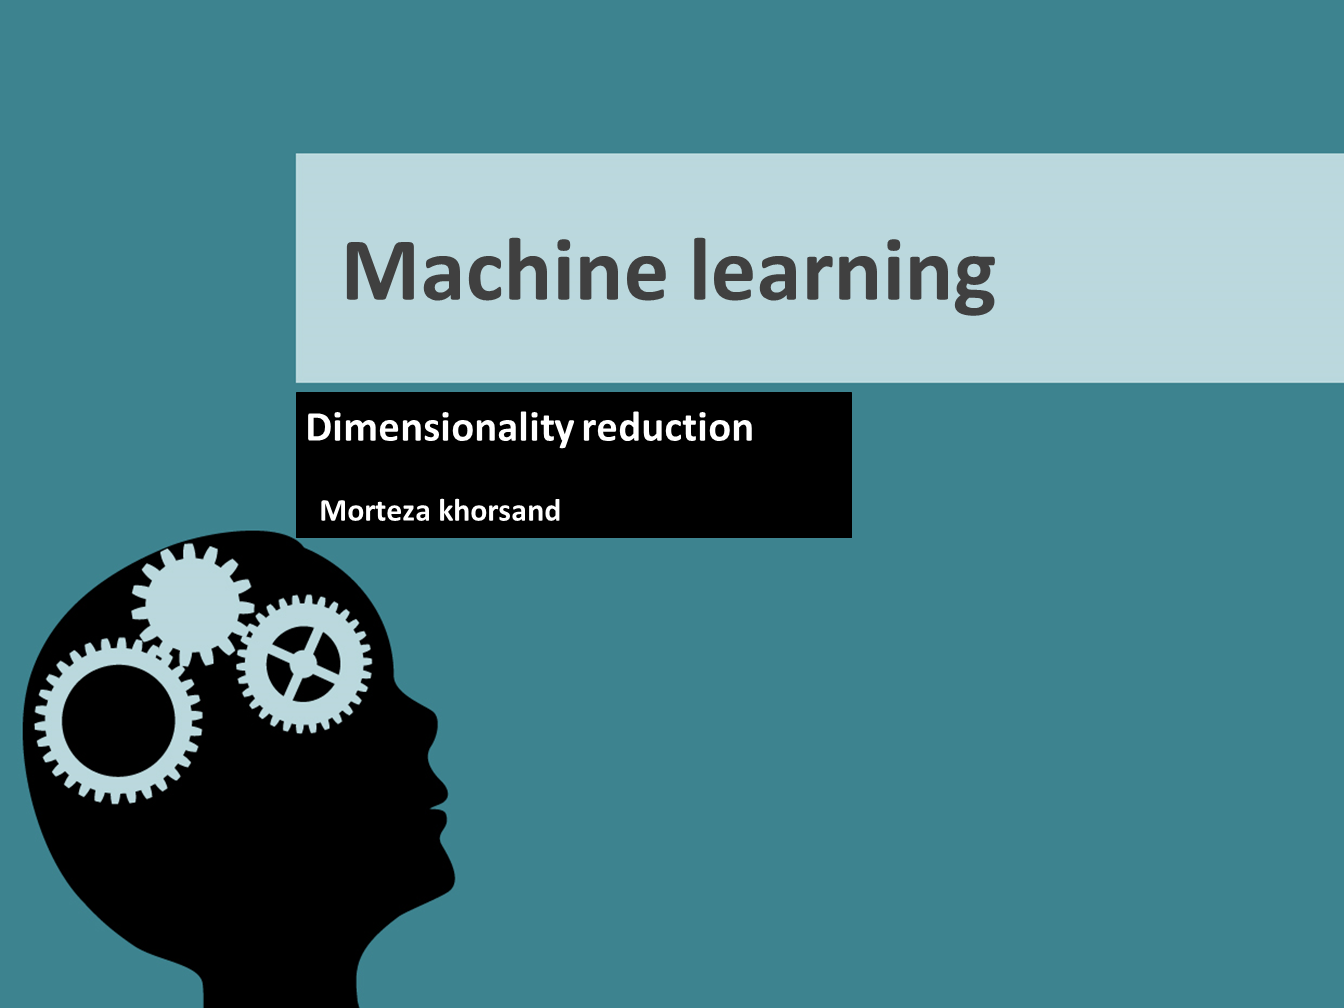

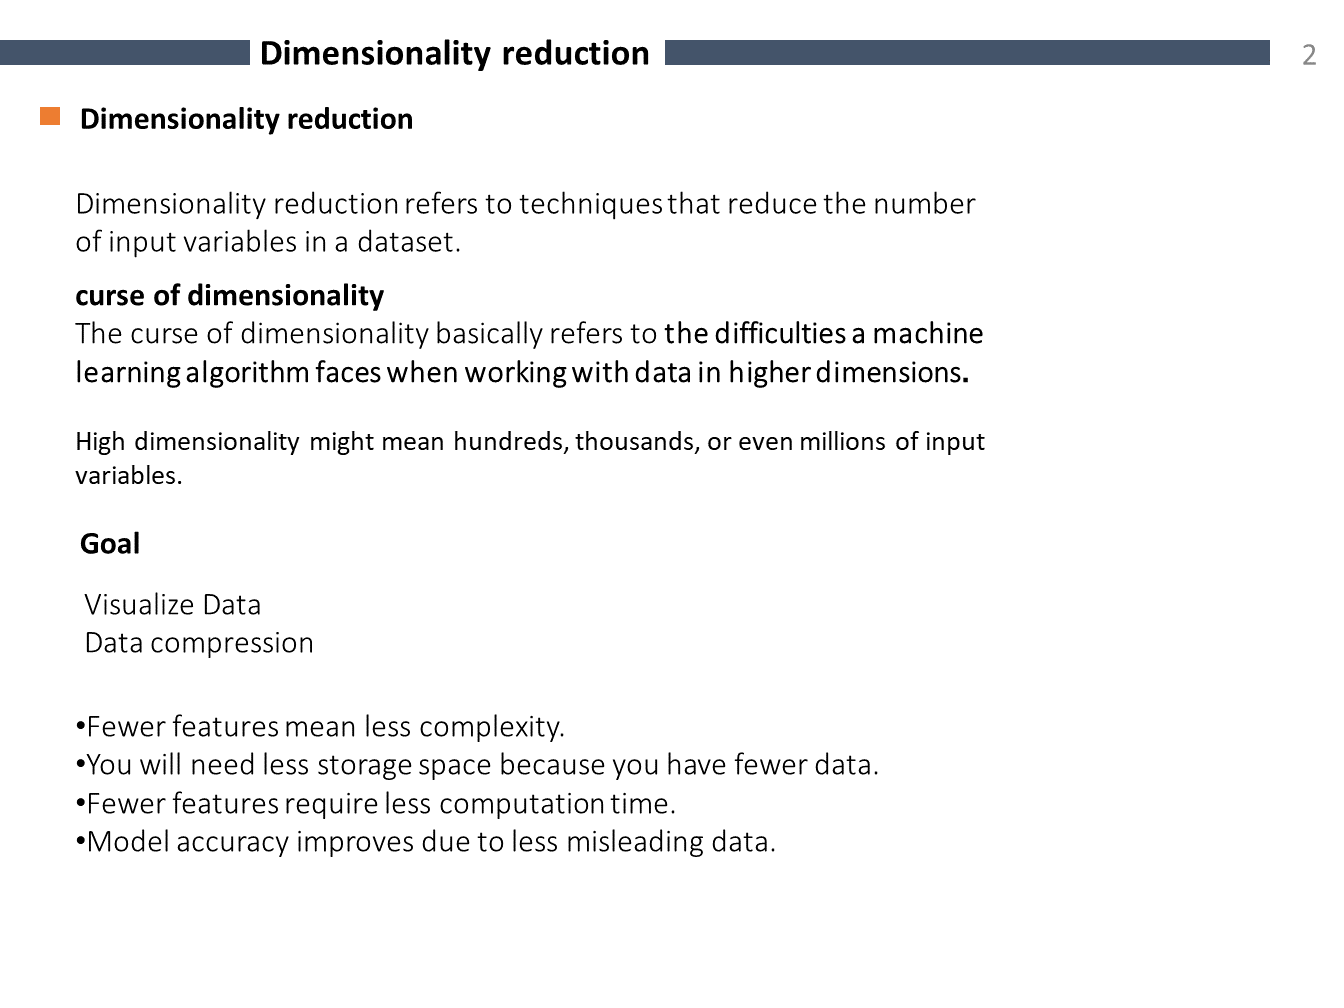

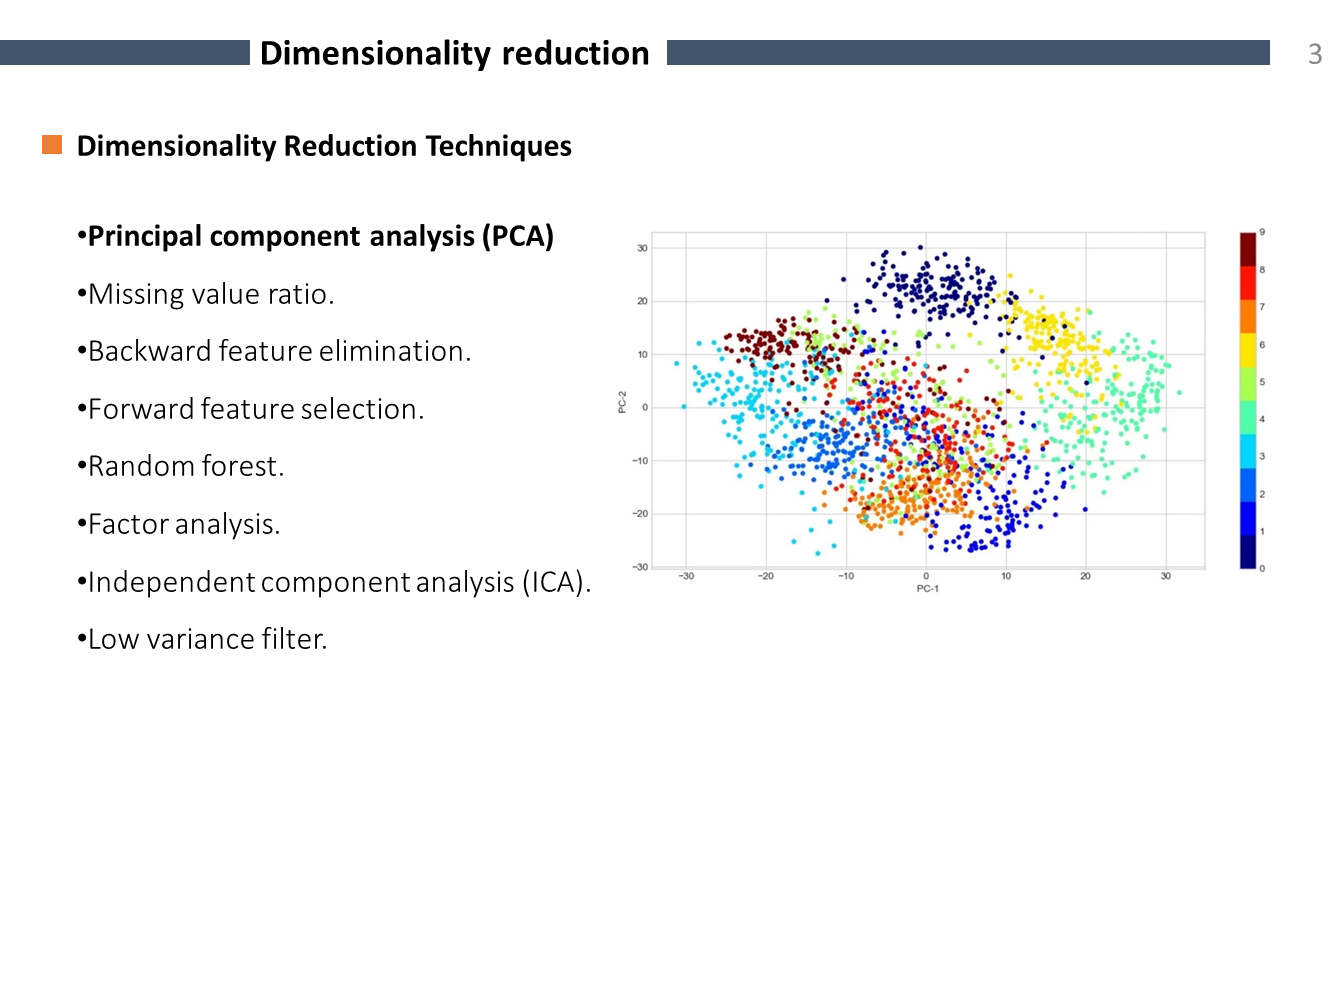

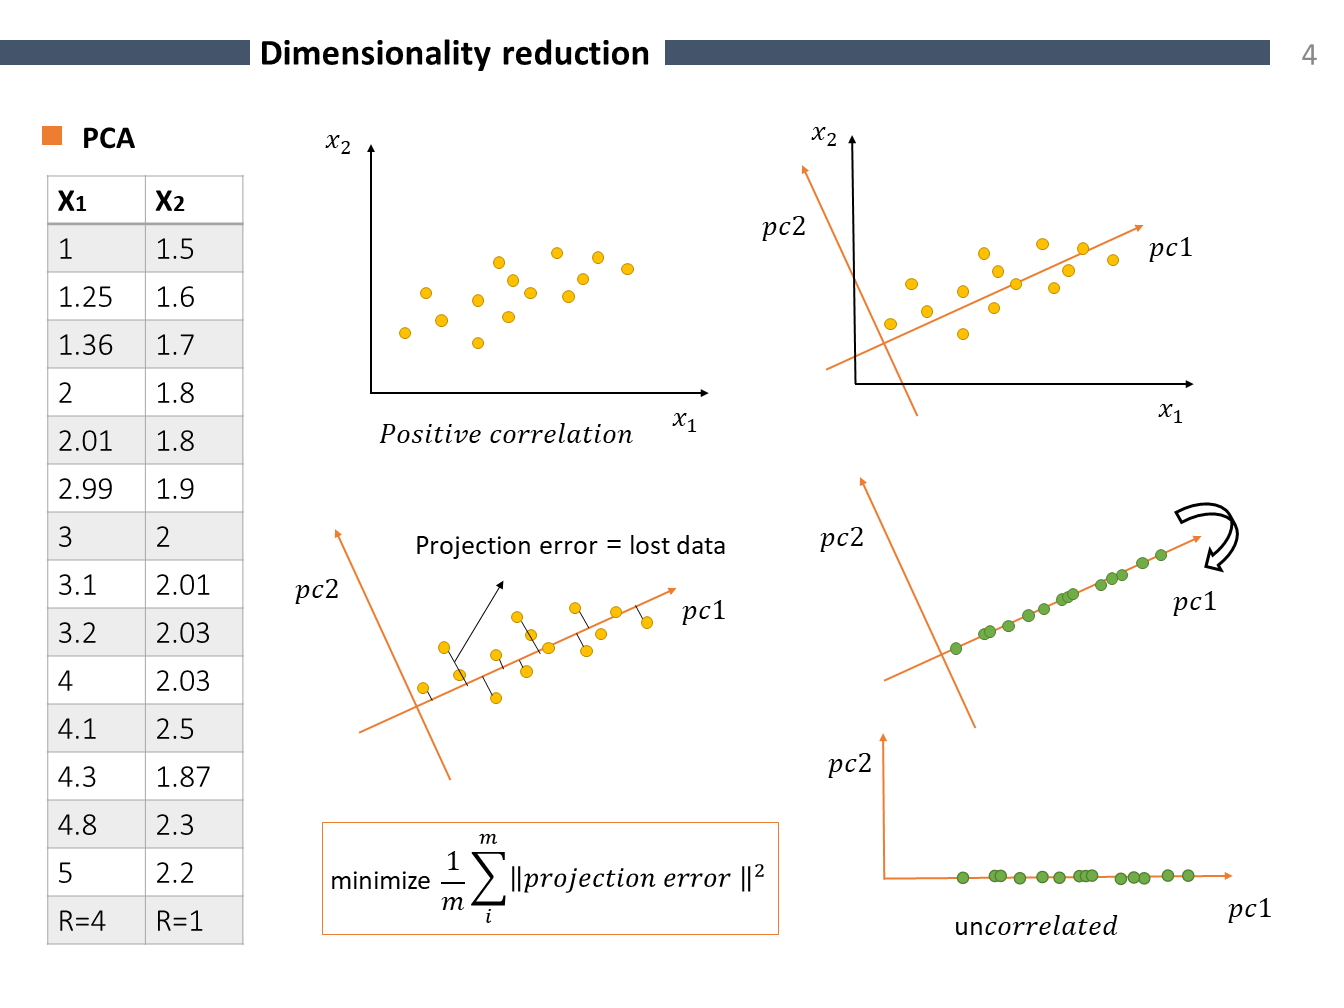

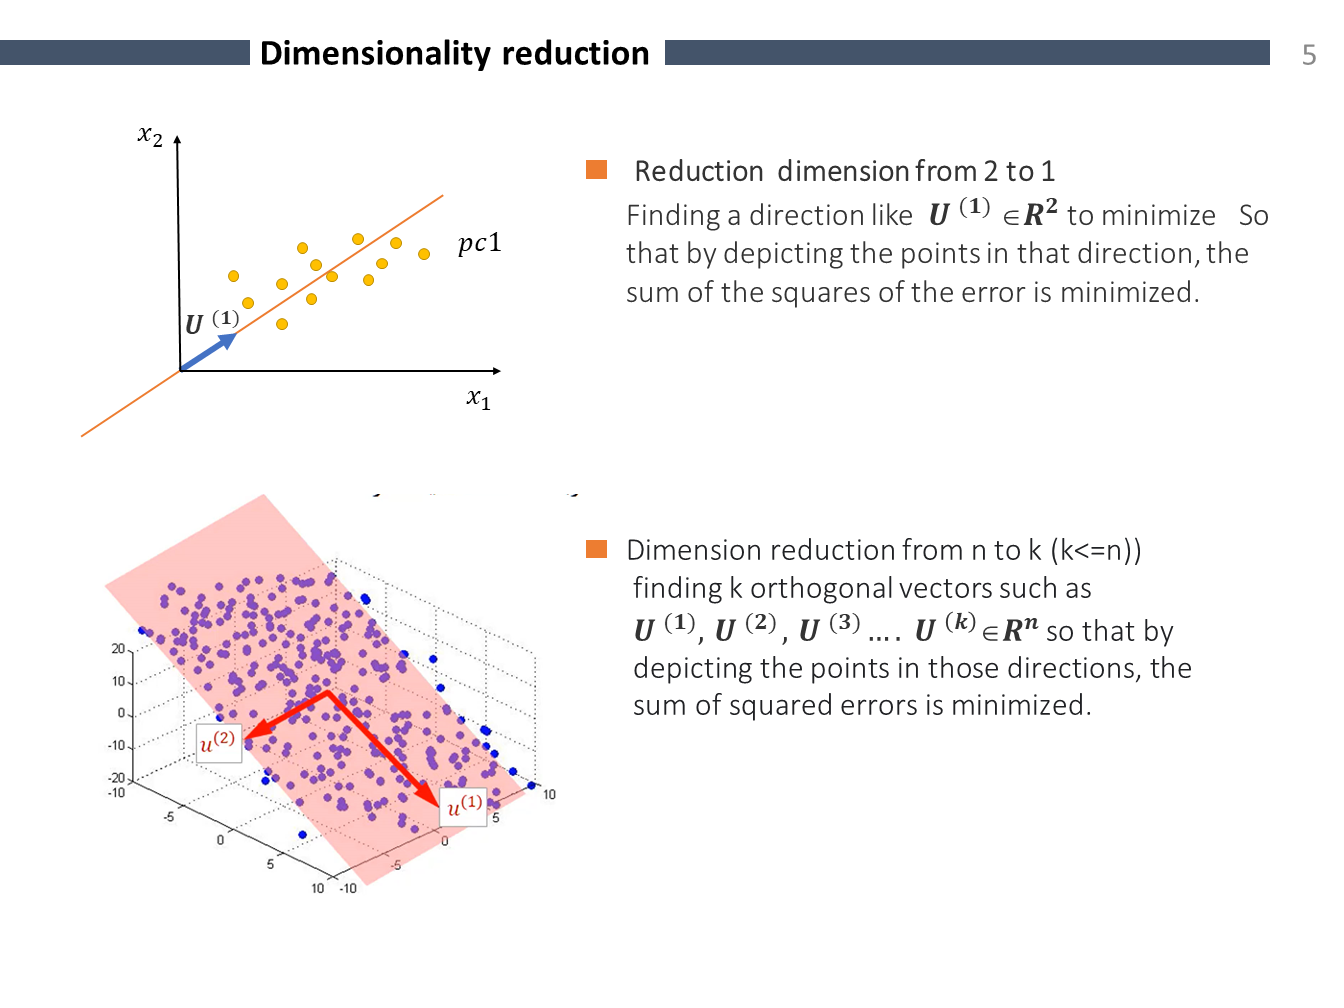

In [1]:
import sys
import numpy as np
np.set_printoptions(precision=2 )
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = np.array([[1 , 1, 1, 0, 0],
              [2,  2, 2, 0, 0],
              [1,  1, 1 ,0 ,0],
              [5 , 5, 5, 0, 0],
              [1  ,1 ,0 ,2 ,2],
              [0  ,0 ,0 ,3 ,3],
              [0  ,0 ,0 ,1 ,1]])


In [3]:
data= pd.DataFrame(X)
data

display(data.corr())

,0,1,2,3,4
0,1.000000,1.000000,0.977965,-0.524628,-0.524628
1,1.000000,1.000000,0.977965,-0.524628,-0.524628
2,0.977965,0.977965,1.000000,-0.588069,-0.588069
3,-0.524628,-0.524628,-0.588069,1.000000,1.000000
4,-0.524628,-0.524628,-0.588069,1.000000,1.000000


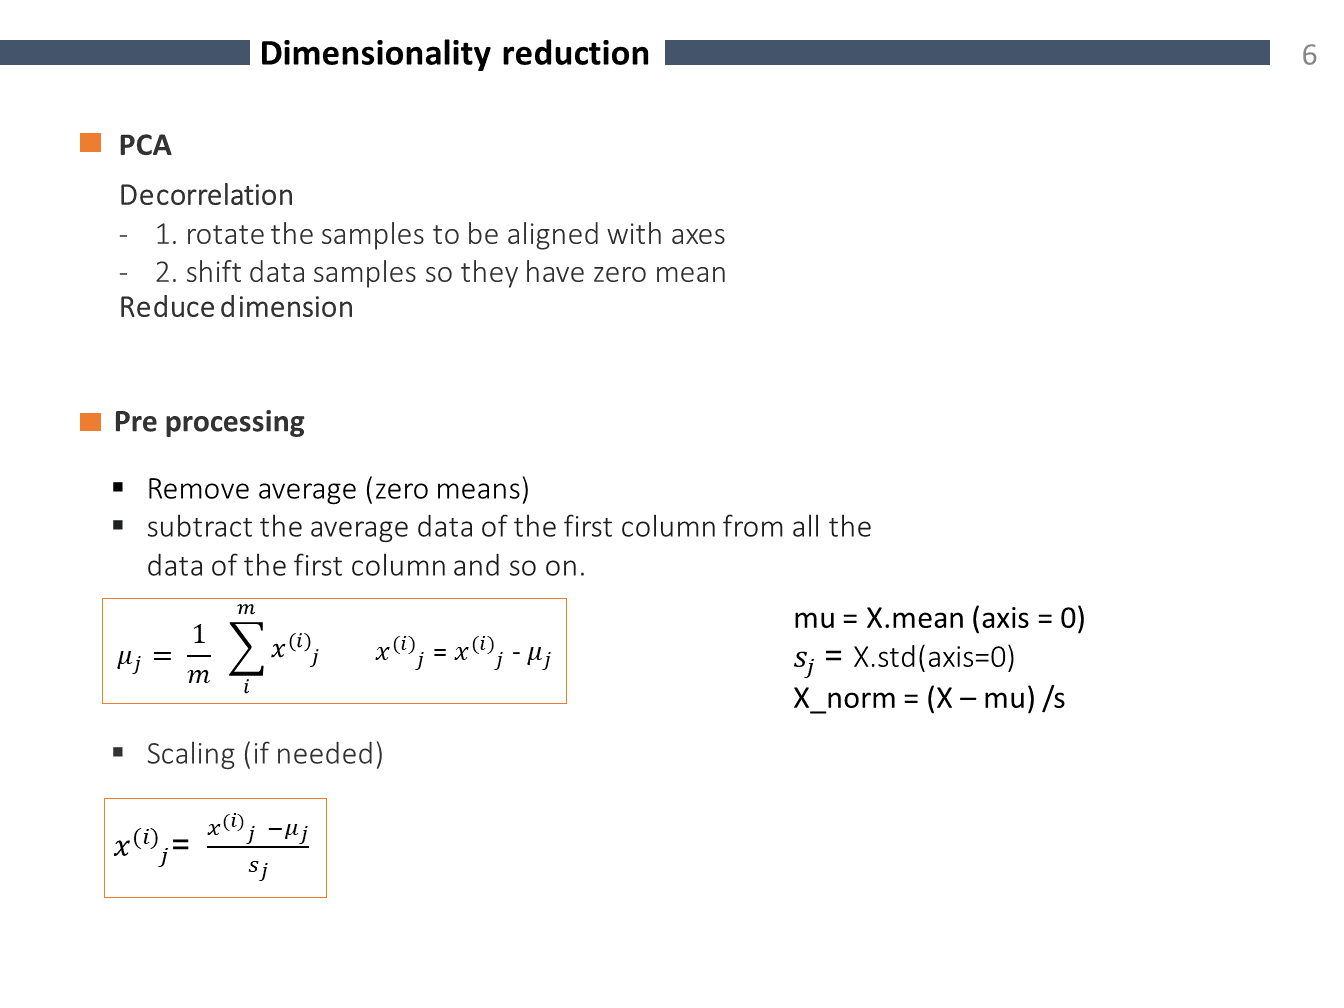

In [4]:
#preprocessing
mu = X.mean (axis = 0)

print(mu)

print("--------------------------------------------")

X_norm =(X - mu) 
print(X_norm )



[1.43 1.43 1.29 0.86 0.86]
--------------------------------------------
[[-0.43 -0.43 -0.29 -0.86 -0.86]
 [ 0.57  0.57  0.71 -0.86 -0.86]
 [-0.43 -0.43 -0.29 -0.86 -0.86]
 [ 3.57  3.57  3.71 -0.86 -0.86]
 [-0.43 -0.43 -1.29  1.14  1.14]
 [-1.43 -1.43 -1.29  2.14  2.14]
 [-1.43 -1.43 -1.29  0.14  0.14]]


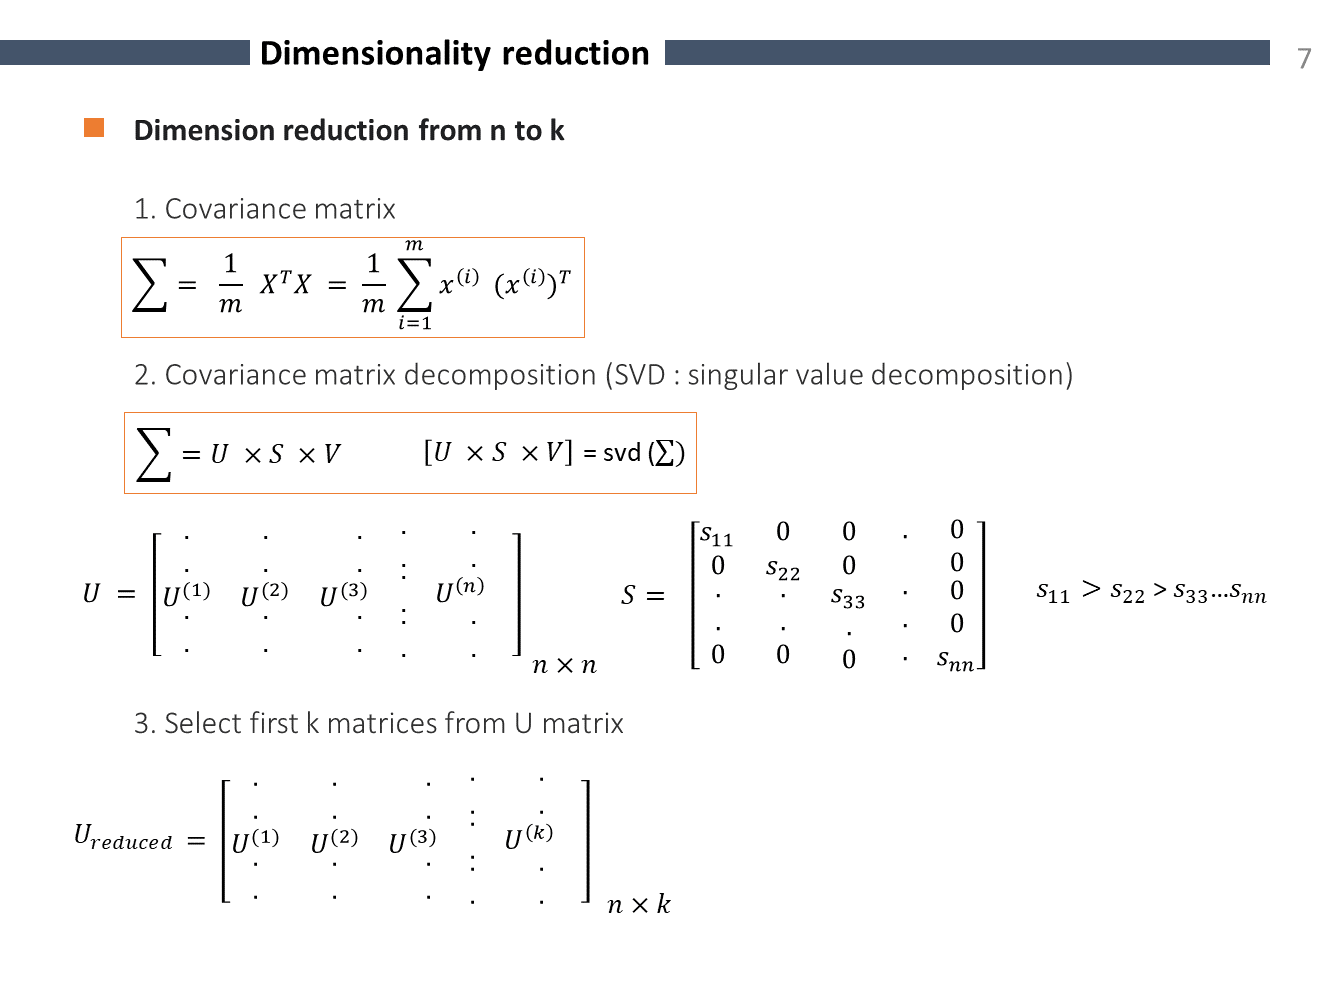

In [5]:
m=X.shape[0]
sigma= (1/m)* X.T@X 
print(sigma)

[[4.57 4.57 4.43 0.29 0.29]
 [4.57 4.57 4.43 0.29 0.29]
 [4.43 4.43 4.43 0.   0.  ]
 [0.29 0.29 0.   2.   2.  ]
 [0.29 0.29 0.   2.   2.  ]]


In [6]:
#decomposition (svd)
U, S, _ = np.linalg.svd(sigma) 

print(U)

print("---------------------------")

print(S)

[[-5.81e-01 -4.61e-03  4.03e-01 -7.07e-01  1.08e-16]
 [-5.81e-01 -4.61e-03  4.03e-01  7.07e-01 -9.53e-17]
 [-5.67e-01  9.62e-02 -8.18e-01 -9.22e-15 -1.31e-17]
 [-3.50e-02 -7.04e-01 -5.85e-02 -6.14e-16 -7.07e-01]
 [-3.50e-02 -7.04e-01 -5.85e-02 -7.25e-16  7.07e-01]]
---------------------------
[1.35e+01 4.00e+00 6.69e-02 5.87e-16 6.06e-48]


In [18]:
U_reduced = U[ : , :2 ]
 
print(U_reduced)

print(np.linalg.norm(U_reduced , axis=0))
print(round(np.dot(U[0], U[1])))

[[-0.58 -0.  ]
 [-0.58 -0.  ]
 [-0.57  0.1 ]
 [-0.03 -0.7 ]
 [-0.03 -0.7 ]]
[1. 1.]
0


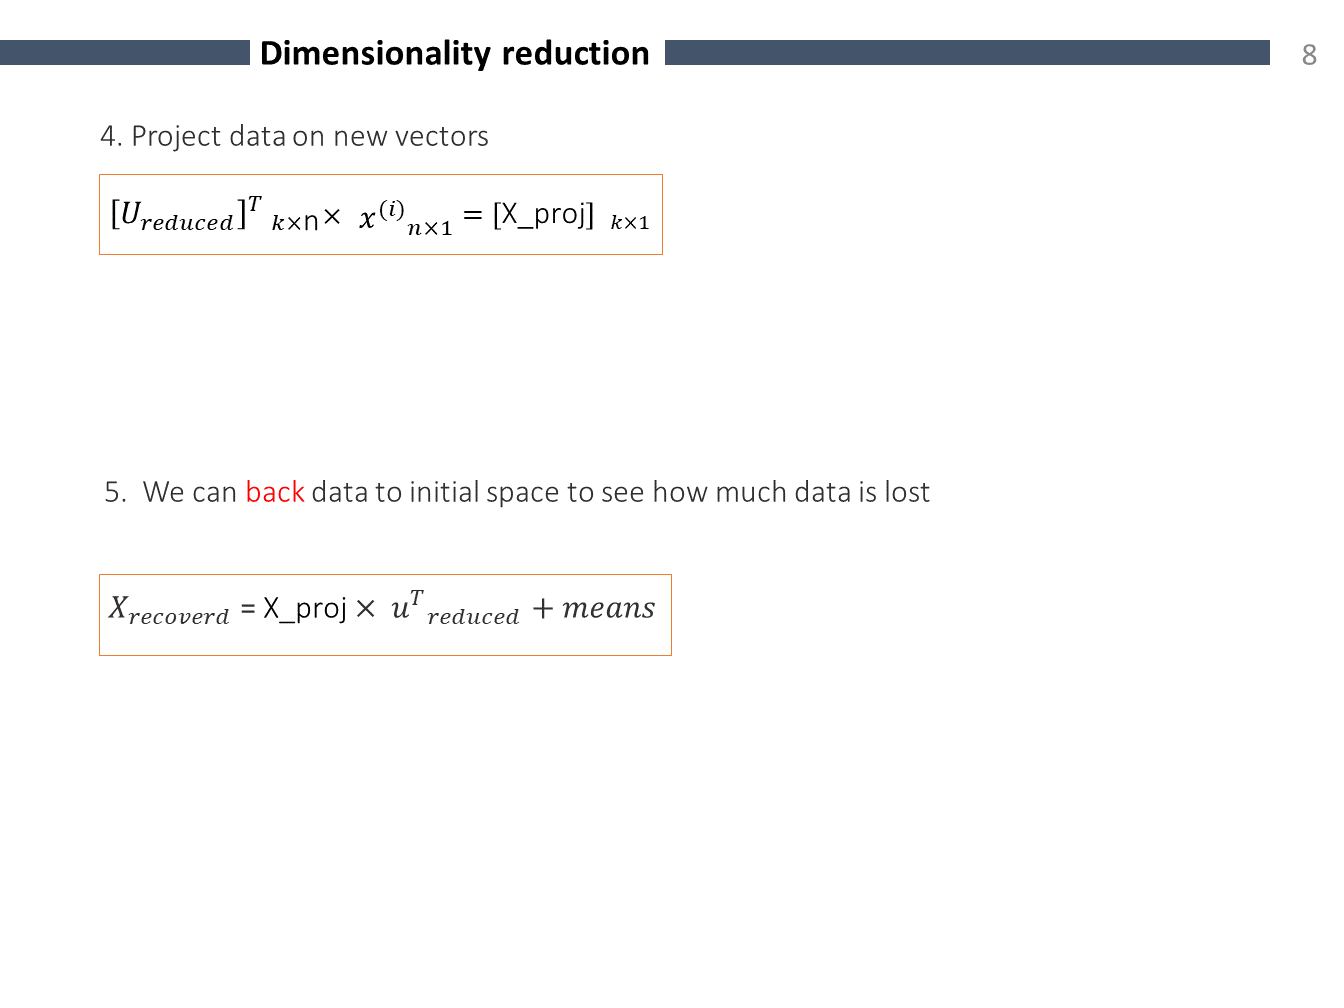

In [ ]:
X_proj = X_norm@ U_reduced 

print(X_proj)

In [ ]:
X_approx = X_proj @ U_reduced.T + mu

print(X_approx)

In [ ]:
X = np.array([[1 , 1, 1, 0, 0],
              [2,  2, 2, 0, 0],
              [1,  1, 1 ,0 ,0],
              [5 , 5, 5, 0, 0],
              [1  ,1 ,0 ,2 ,2],
              [0  ,0 ,0 ,3 ,3],
              [0  ,0 ,0 ,1 ,1]])

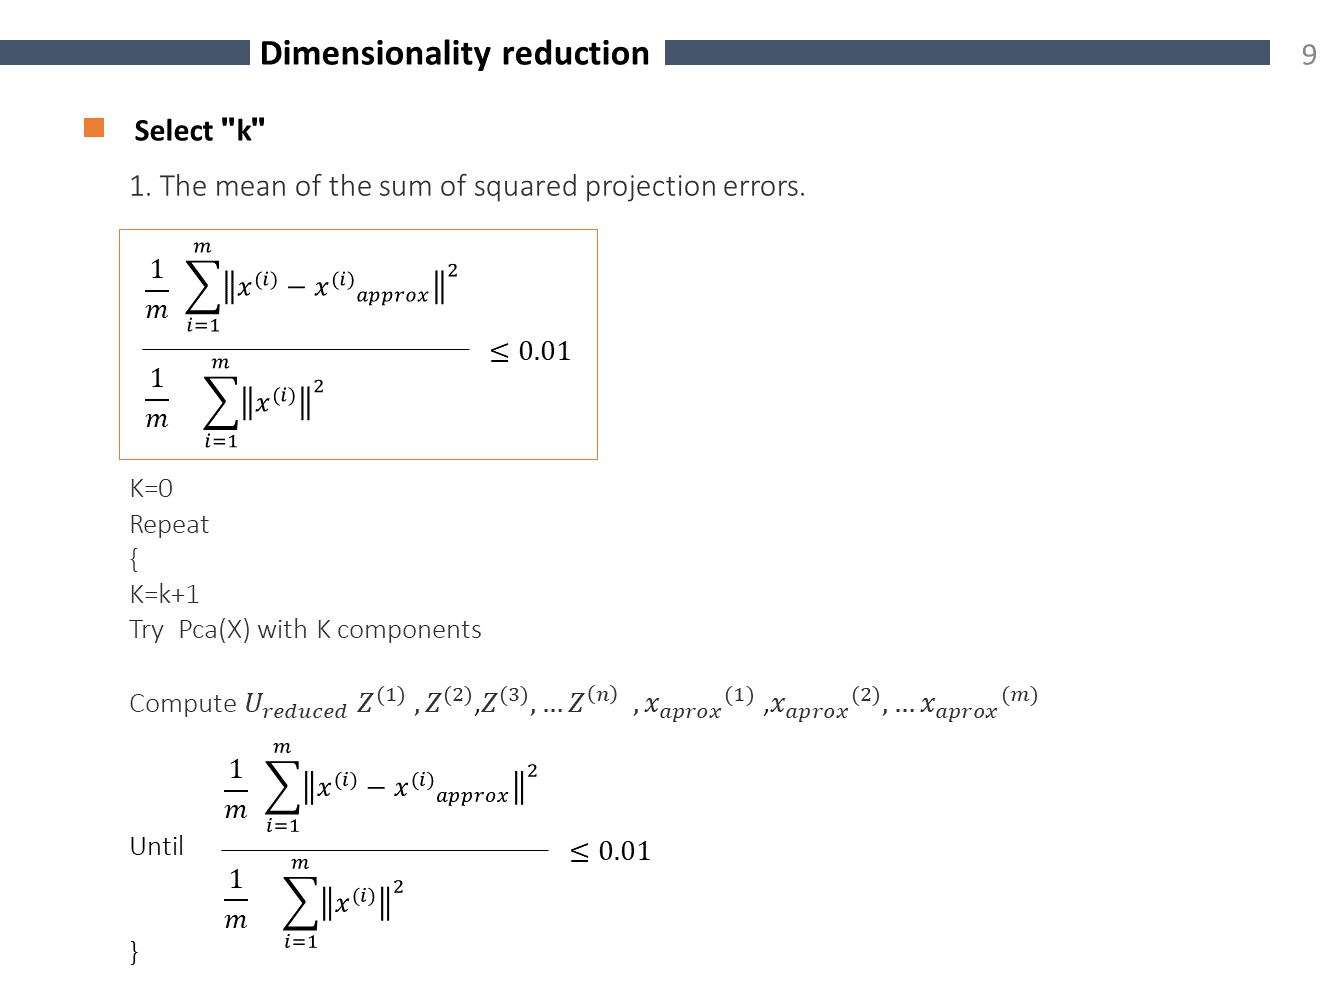

In [ ]:
m, n = X.shape
X= X - X.mean(axis=0)
sigma= (X.T @X) / m

U , S , V = np.linalg.svd(sigma)

for k in range(n+1):
    total_var = np.sum(S[ : k]) / np.sum(S)
    if total_var >= 0.99: 
        print(k)
        break

    



# PCA class

In [ ]:
class Pca:
    def __init__ (self , X , variance):
        self.X = X
        self.variance = variance
        
    def train(self):
        m,n = self.X.shape
        mu=self.X .mean(axis=0)
        std=self.X .std(axis=0)
        X= (self.X-mu) /std
        
        sigma = self.X.T @ self.X
        u, s, _ = np.linalg.svd(sigma)
        
        last_k=0
        for k in range(n+1):
            total_var = np.sum(s[ : k]) / np.sum(s)
            if total_var >= self.variance:
                last_k = k
                break
                
        
        u_reduced = u[: , : last_k]
        x_proj = self.X@u_reduced 
                 
        X_recoverd= ((x_proj @ u_reduced.T) + mu ) * std 
                 
        return  sigma , u , s , u_reduced  , x_proj  , X_recoverd
   

# Example

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
seed=pd.read_csv("seeds-width-vs-length.csv")
data=np.array(seed)
d = {'width': data[: , 0], "length" : data[: , 1]}

df=pd.DataFrame(d)
df

In [ ]:
plt.plot(df["width"] , df["length"] , "o") ;
plt.xlabel("width")
plt.ylabel("length")
plt.show()

In [ ]:
df.corr()

In [ ]:
A= Pca(data , 0.99)

sigma=A.train()[0]
u=A.train()[1]
s=A.train()[2]
u_reduced=A.train()[3]
x_proj=A.train()[4]
X_recoverd=A.train()[5]

print(sigma)
print("--------------")
print(u)
print("--------------")
print(s)
print("--------------")
print(u_reduced)
print("--------------")
print((np.linalg.norm(u_reduced)))
print("--------------")
print((round(np.dot(u[0], u[1]))))
print("--------------")
print(x_proj[: 10])
print("--------------")
print(X_recoverd[: 10])



# Sklearn

In [ ]:
from sklearn.decomposition import PCA   #TruncatedSVD

In [ ]:
pca = PCA()
pca.fit(data)
transformed=pca.transform(data)     #project

In [ ]:
U = pca.components_          # Principal Components (directions)
S = pca.explained_variance_  # importance of ecah direction (variances)

print("1st Principal Component: {} ({:.2f})".format(U[0], S[0]))
print("2nd Principal Component: {} ({:.2f})".format(U[1], S[1]))

In [ ]:
print(np.linalg.norm(U[0]))
print(np.linalg.norm(U[1]))

In [ ]:
print(np.dot(U[0], U[1]))

In [ ]:
mean=pca.mean_
mean

In [ ]:
# plot data
c = transformed[ :, 0]          # colors
plt.scatter(data[:, 0], data[:, 1], s=50, c=c, cmap='viridis', alpha=0.5)

plt.arrow(mean[0] , mean[1],  1.5 * np.sqrt(S[0]) * U[0, 0],
          1.5 * np.sqrt(S[0]) * U[0, 1],
          width=.01, head_width=.06, color='k')

plt.arrow( mean[0] , mean[1], 1.5 * np.sqrt(S[1]) * U[1, 0],
           1.5 * np.sqrt(S[1]) * U[1, 1],
           width=.01, head_width=.06, color='k')

plt.title("Principal Components")
plt.axis('equal')
plt.show()

In [ ]:
pca = PCA(0.93)                        # keep 93% of variance
X_proj = pca.fit_transform(data)

print(data.shape)
print(X_proj.shape)


In [ ]:
X_approx = pca.inverse_transform(X_proj)

# plot original data
plt.scatter(data[:, 0], data[:, 1], s=50, c=c, cmap='viridis', alpha=0.2) 

# plot projected data
plt.scatter(X_approx[:, 0], X_approx[:, 1], s=50, c=c, cmap='viridis', alpha=0.9)  

plt.title("Projected Data")
plt.axis('equal')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

pca = PCA().fit(data)  # Notice

plt.bar(range(len(pca.explained_variance_ratio_)),
        pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')

plt.step(range(len(pca.explained_variance_ratio_)),
         np.cumsum(pca.explained_variance_ratio_),
         where='mid')
plt.xticks([0, 1], [1 ,2])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
total_var = np.cumsum(pca.explained_variance_ratio_)

for i in [0, 1]:
    print("Components: {:2d}, total explained variance: {:.2f}".format(i, total_var[i]))

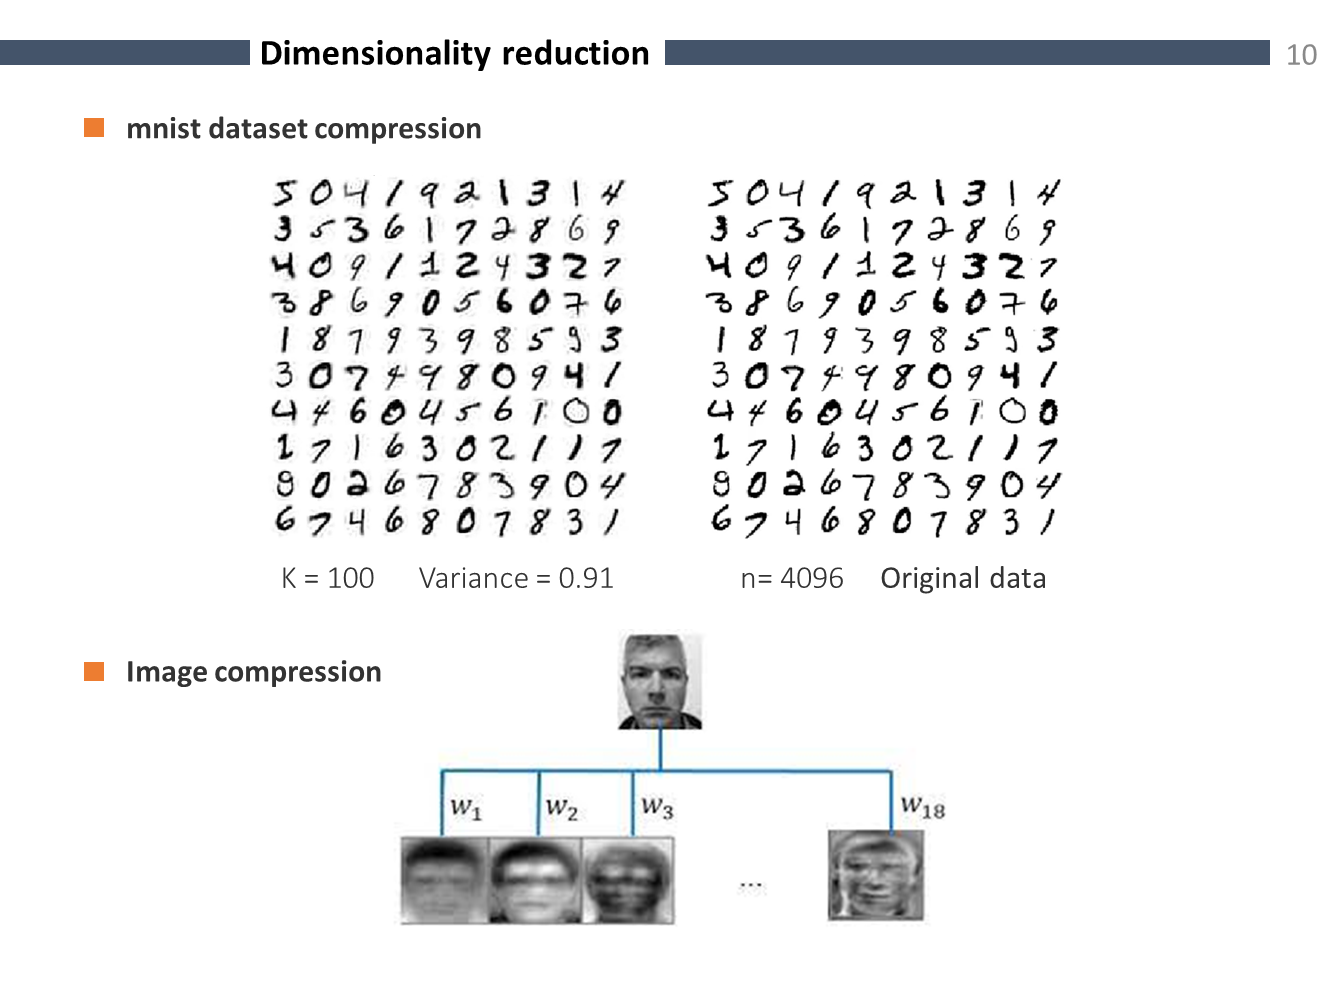

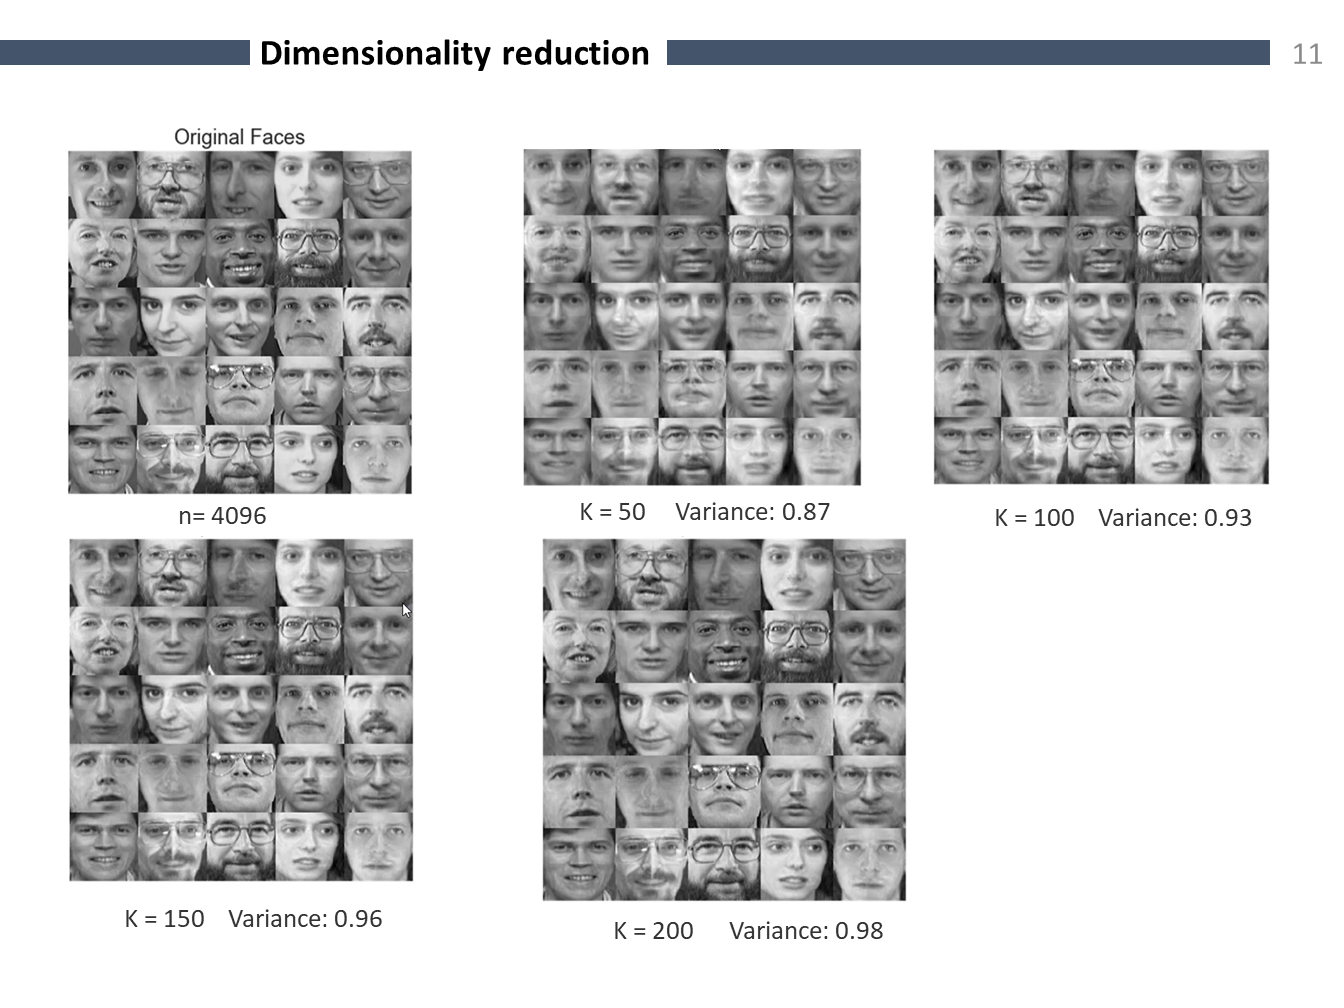